

# The "occasionally dishonest casino" HMM

We use the [ssm-jax](https://github.com/probml/ssm-jax/blob/main/ssm_jax/) library.



In [1]:
try:
    import matplotlib.pyplot as plt
except ModuleNotFoundError:
    %pip install -qq matplotlib.pyplot
    import matplotlib.pyplot as plt

try:
    import seaborn as sns
except ModuleNotFoundError:
    %pip install -qq seaborn
    import seaborn as sns
%matplotlib inline

import numpy as np


try:
    import probml_utils as pml
    from probml_utils import savefig, latexify
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    import probml_utils as pml
    from probml_utils import savefig, latexify
%pip install -qq git+https://github.com/probml/ssm-jax.git

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Silence WARNING:root:The use of `check_types` is deprecated and does not have any effect.
# https://github.com/tensorflow/probability/issues/1523
import logging

logger = logging.getLogger()


class CheckTypesFilter(logging.Filter):
    def filter(self, record):
        return "check_types" not in record.getMessage()


logger.addFilter(CheckTypesFilter())

In [3]:
try:
    from ssm_jax.hmm.demos.casino_hmm import make_model_and_data, plot_results, plot_inference
except ModuleNotFoundError:
    %pip install -qq ssm_jax
    from ssm_jax.hmm.demos.casino_hmm import make_model_and_data, plot_results, plot_inference

In [ ]:
latexify(width_scale_factor=3.2, fig_height=1.5)

: 

In [5]:
hmm, true_states, emissions = make_model_and_data()
posterior = hmm.smoother(emissions)
most_likely_states = hmm.most_likely_states(emissions)

Printing sample observed/latent...
hid:  111111111122221111111111111111111111222222222122221111111111
obs:  135553452655336631635155152623211211346222126326426542234464
Log likelihood:  -523.9222


/tmp/ipykernel_2247/936813053.py:13: UserWarning: Matplotlib is currently using ps, which is a non-GUI backend, so cannot show the figure.
  fig.show()


saving image to fig/hmm_casino_filter_latexified.pdf
Figure size: [6.  1.5]


/tmp/ipykernel_2247/936813053.py:21: UserWarning: Matplotlib is currently using ps, which is a non-GUI backend, so cannot show the figure.
  fig.show()


saving image to fig/hmm_casino_smooth_latexified.pdf
Figure size: [6.  1.5]
saving image to fig/hmm_casino_map_latexified.pdf
Figure size: [6.  1.5]


/tmp/ipykernel_2247/936813053.py:29: UserWarning: Matplotlib is currently using ps, which is a non-GUI backend, so cannot show the figure.
  fig.show()


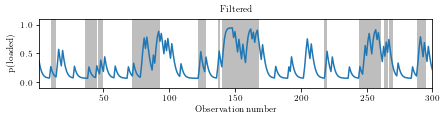

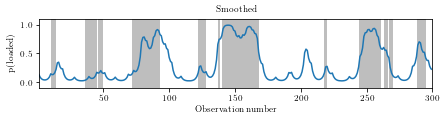

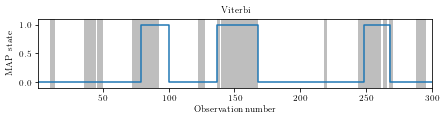

In [6]:
def plot_results(true_states, emissions, posterior, most_likely_states):
    print("Printing sample observed/latent...")
    to_string = lambda x: "".join((np.array(x) + 1).astype(str))[:60]
    print("hid: ", to_string(true_states)[:60])
    print("obs: ", to_string(emissions)[:60])
    print("Log likelihood: ", posterior.marginal_loglik)

    fig, ax = plt.subplots()
    plot_inference(posterior.filtered_probs, true_states, ax)
    ax.set_ylabel("p(loaded)")
    ax.set_title("Filtered")
    sns.despine()
    fig.show()
    pml.savefig("hmm_casino_filter")

    fig, ax = plt.subplots()
    plot_inference(posterior.smoothed_probs, true_states, ax)
    ax.set_ylabel("p(loaded)")
    ax.set_title("Smoothed")
    sns.despine()
    fig.show()
    pml.savefig("hmm_casino_smooth")

    fig, ax = plt.subplots()
    plot_inference(most_likely_states, true_states, ax, map_estimate=True)
    ax.set_ylabel("MAP state")
    ax.set_title("Viterbi")
    sns.despine()
    fig.show()
    pml.savefig("hmm_casino_map")


plot_results(true_states, emissions, posterior, most_likely_states)